In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("air_quality_dataset_correlated_3000.csv")

In [18]:
import pandas as pd
from scipy.spatial import cKDTree

# Load data
df1 = pd.read_csv('AQI_2.csv', encoding='latin-1')

# Rename PM2.5 in df2 before matching to avoid conflict
df2 = df.rename(columns={'PM2.5': 'PM2.5_matched'})

# KDTree matching
tree = cKDTree(df2[['PM2.5_matched']].values)
distances, indices = tree.query(df1[['PM2.5']].values, k=1)

# Merge
matched_df2 = df2.iloc[indices].reset_index(drop=True)
merged_df = pd.concat([df1.reset_index(drop=True), matched_df2], axis=1)

# Drop one of the PM2.5 columns (e.g., matched one)
merged_df = merged_df.drop(columns=['PM2.5_matched'])  # or drop 'PM2.5' from df1 if you prefer


In [19]:
merged_df.columns

Index(['Temperature', 'Pressure', 'Humidity', 'Sunshine', 'Wind Speed',
       'Wind Direction', 'VOC', 'Noise', 'CO2', 'CH2O', 'O3', 'PM1 ', 'PM2.5',
       'PM10', 'SO2', 'CO', 'NO2', 'PM10', 'NO', 'NO2', 'NOx', 'Benzene',
       'Toluene', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'SO2', 'NH3',
       'CO_max_8hr', 'O3_max_8hr'],
      dtype='object')

### Data set cleaning and Initial Data Analysis

In [2]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Benzene', 'Toluene', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'SO2', 'NH3', 'CO_max_8hr', 'O3_max_8hr'],
      dtype='object')

In [3]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,Benzene,Toluene,RH,WS,WD,SR,BP,AT,SO2,NH3,CO_max_8hr,O3_max_8hr
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,116.212367,218.729996,47.236412,40.005492,59.284609,4.666959,33.512007,61.437094,1.040620,189.540495,82.085877,984.735548,25.520106,12.574525,33.562946,2.065343,49.946150
std,84.413680,121.814876,38.327559,15.994232,39.248977,2.275869,13.189160,18.595453,0.416006,62.504434,38.894916,6.642967,7.447353,3.260387,13.583492,0.958094,26.526286
min,8.150000,15.520000,1.850000,10.530000,8.070000,0.440000,1.650000,16.320000,0.160000,63.940000,4.420000,971.310000,5.800000,6.430000,12.010000,0.670000,6.350000
25%,46.265201,130.672411,12.826006,28.507635,26.160066,3.064438,24.738326,48.656558,0.758469,145.110533,54.846185,979.989775,20.282862,10.232909,23.526507,1.328190,30.155071
50%,107.902268,216.380621,42.673572,39.726764,57.094560,4.628581,33.438231,61.687686,1.035188,187.880217,81.738069,984.696042,25.536107,12.500220,32.817351,1.987887,49.376884
75%,173.047352,298.976953,72.041191,51.207787,84.502919,6.213016,42.535980,74.421431,1.321122,233.700538,108.325069,989.709571,31.015320,14.797232,43.006968,2.731158,67.800411
max,497.630790,652.030000,217.619025,97.651179,206.951745,12.377280,79.510000,99.000000,2.529430,331.250000,213.322425,997.480000,39.150000,23.097290,85.238367,5.203848,133.176734


In [4]:
import pandas as pd

# Sample PM2.5 Breakpoints and AQI Ranges
breakpoints_pm25 = [
    (0.0, 9.0, 0, 50),
    (9.1, 35.4, 51, 100),
    (35.5, 55.4, 101, 150),
    (55.5, 125.4, 151, 200),
    (125.5, 225.4, 201, 300),
    (225.5, 500.4, 301, 500)
]

# AQI Categories
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# AQI Calculation Function
def calculate_aqi(concentration, breakpoints):
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints:
        if bp_lo <= concentration <= bp_hi:
            return round(((i_hi - i_lo) / (bp_hi - bp_lo)) * (concentration - bp_lo) + i_lo)
    return None  # Out of range

# Apply AQI Calculation to PM2.5 column
df["AQI_PM2.5"] = df["PM2.5"].apply(lambda x: calculate_aqi(x, breakpoints_pm25))
df["AQI_Category"] = df["AQI_PM2.5"].apply(categorize_aqi)

In [5]:
df_cleaned = df.dropna()
df_cleaned['pollutionRatio']=df_cleaned['Benzene']/df_cleaned['Toluene']
df_cleaned['NO*Ws'] = df_cleaned['NO']*df_cleaned['WS']
df_cleaned.head()

/var/folders/0q/vsvgsd3s4ws83m1fcrysjbvc0000gn/T/ipykernel_34845/2343891808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pollutionRatio']=df_cleaned['Benzene']/df_cleaned['Toluene']
/var/folders/0q/vsvgsd3s4ws83m1fcrysjbvc0000gn/T/ipykernel_34845/2343891808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['NO*Ws'] = df_cleaned['NO']*df_cleaned['WS']


,PM2.5,PM10,NO,NO2,NOx,Benzene,Toluene,RH,WS,WD,...,BP,AT,SO2,NH3,CO_max_8hr,O3_max_8hr,AQI_PM2.5,AQI_Category,pollutionRatio,NO*Ws
0,157.108622,227.832836,64.074879,53.174701,82.786195,6.520114,31.158716,63.293394,1.026232,230.783324,...,989.873383,32.315214,14.753886,48.177829,2.696816,97.111004,232.0,Very Unhealthy,0.209255,65.755702
1,8.150000,15.520000,1.850000,20.948354,8.070000,2.513483,16.354034,35.812253,0.473676,128.406311,...,981.110882,20.082866,9.467940,12.010000,1.421097,17.547341,45.0,Good,0.153692,0.876301
2,118.737354,258.789414,84.875195,47.920183,64.886227,5.233880,31.741881,62.427723,1.470767,245.490335,...,989.954203,35.754557,17.690593,54.462860,2.903200,101.852036,195.0,Unhealthy,0.164889,124.831654
3,193.031999,303.083785,101.148209,51.242690,76.535339,7.808313,41.575516,70.798149,1.239769,216.414456,...,989.240902,28.875191,12.014509,46.998300,3.076310,80.428899,268.0,Very Unhealthy,0.187810,125.400406
4,148.698400,188.777638,29.582653,28.511134,54.949897,4.904273,32.613540,48.577728,0.928544,208.896339,...,982.836992,25.770560,12.941253,21.518878,1.329268,28.076582,224.0,Very Unhealthy,0.150375,27.468801


In [6]:
y = df_cleaned['AQI_Category']
len(y)

2995

In [7]:
X = df_cleaned
print(len(X))

2995


In [8]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

print("\nGenerating Polynomial Features (Degree 2):")
print("==========================================")

# Select numerical features for interaction (exclude target, identifiers, and potentially highly correlated ones if needed)
# Let's use a subset of the original numerical features before PCA
poly_features_input_cols = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Humidity', 'WS', 'Benzene', 'Toluene', 'NO']
# Ensure only columns present in the dataframe are selected
poly_features_input_cols = [col for col in poly_features_input_cols if col in df_cleaned.columns]

if not poly_features_input_cols:
    print("Skipping Polynomial Features: No suitable input columns found.")
else:
    print(f"Input columns for Polynomial Features: {poly_features_input_cols}")

    # Select the data and handle potential NaNs before applying PolynomialFeatures
    poly_data = df_cleaned[poly_features_input_cols].copy()
    # Option: Impute NaNs if necessary, e.g., poly_data.fillna(poly_data.mean(), inplace=True)
    # For now, let's see how many NaNs we have
    initial_nan_count = poly_data.isnull().sum().sum()
    if initial_nan_count > 0:
        print(f"Warning: Input data for Polynomial Features contains {initial_nan_count} NaN values. Consider imputation.")
        # Simple mean imputation for demonstration:
        print("Applying mean imputation before generating polynomial features.")
        poly_data.fillna(poly_data.mean(), inplace=True)


    # Initialize PolynomialFeatures (degree=2 includes interactions and squares)
    # include_bias=False avoids adding a column of ones
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

    # Fit and transform the data
    poly_features = poly.fit_transform(poly_data)

    # Get the names of the new features
    poly_feature_names = poly.get_feature_names_out(poly_features_input_cols)

    # Create a new DataFrame with these features
    df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=poly_data.index)
    print(f"Generated {df_poly.shape[1]} polynomial features.")

    # Add these new features back to the original DataFrame
    # Avoid adding duplicate columns if some poly features match existing ones (though unlikely with include_bias=False)
    cols_to_add = [col for col in df_poly.columns if col not in df_cleaned.columns]
    df = pd.concat([df_cleaned, df_poly[cols_to_add]], axis=1)

    print(f"Added {len(cols_to_add)} new polynomial features to the DataFrame.")
    # Display some of the new feature names
    print("Example new feature names:", list(cols_to_add[:5]) + list(cols_to_add[-5:]))

print("--- End Polynomial Features ---")


Generating Polynomial Features (Degree 2):
Input columns for Polynomial Features: ['PM10', 'SO2', 'NO2', 'WS', 'Benzene', 'Toluene', 'NO']
Generated 35 polynomial features.
Added 28 new polynomial features to the DataFrame.
Example new feature names: ['PM10^2', 'PM10 SO2', 'PM10 NO2', 'PM10 WS', 'PM10 Benzene', 'Benzene Toluene', 'Benzene NO', 'Toluene^2', 'Toluene NO', 'NO^2']
--- End Polynomial Features ---


##### Outlier investigation

In [9]:
len(df.columns)

49

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Make a copy of the original dataframe to avoid modifying it
df_copy = df.copy()

# Separate target
y = df_copy['AQI_Category']

# Scale features
scaler = MinMaxScaler()
X_columns = df_copy.drop(columns=['AQI_Category']).columns
X_scaled = scaler.fit_transform(df_copy.drop(columns=['AQI_Category']))
X = pd.DataFrame(X_scaled, columns=X_columns, index=df_copy.index)

# Compute IQR bounds for all columns
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for rows *without* any outliers
mask = ~((X < lower_bound) | (X > upper_bound)).any(axis=1)

# Apply the mask to both X and y, making sure they share the same index
X_filtered = X[mask]
y_filtered = y[mask]  # This should work now since X and y share the same index

# Verify that the indices match
assert X_filtered.index.equals(y_filtered.index), "Indices of X and y don't match"

# Now X_filtered and y_filtered are ready for modeling

In [11]:
print(len(X))
print(len(y))

2995
2995


#### Feature importance

In [13]:
X.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'Benzene', 'Toluene', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'SO2', 'NH3', 'CO_max_8hr', 'O3_max_8hr',
       'AQI_PM2.5', 'pollutionRatio', 'NO*Ws', 'PM10^2', 'PM10 SO2',
       'PM10 NO2', 'PM10 WS', 'PM10 Benzene', 'PM10 Toluene', 'PM10 NO',
       'SO2^2', 'SO2 NO2', 'SO2 WS', 'SO2 Benzene', 'SO2 Toluene', 'SO2 NO',
       'NO2^2', 'NO2 WS', 'NO2 Benzene', 'NO2 Toluene', 'NO2 NO', 'WS^2',
       'WS Benzene', 'WS Toluene', 'WS NO', 'Benzene^2', 'Benzene Toluene',
       'Benzene NO', 'Toluene^2', 'Toluene NO', 'NO^2'],
      dtype='object')

In [14]:
y

0       Very Unhealthy
1                 Good
2            Unhealthy
3       Very Unhealthy
4       Very Unhealthy
             ...      
2995              Good
2996         Hazardous
2997    Very Unhealthy
2998         Unhealthy
2999         Hazardous
Name: AQI_Category, Length: 2995, dtype: object

In [12]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# X = features, y = target
model = RandomForestClassifier()
model.fit(X, y)

# Get importance
importances = pd.Series(model.feature_importances_, index=X.columns)
important_vars = importances.sort_values(ascending=False)
print(important_vars.head(10))  # Top 10 important features


PM2.5           0.275587
AQI_PM2.5       0.264399
PM10            0.045070
PM10^2          0.043118
PM10 NO         0.038955
PM10 NO2        0.033208
PM10 Toluene    0.029507
PM10 SO2        0.028323
PM10 Benzene    0.027508
PM10 WS         0.023226
dtype: float64


<Axes: >

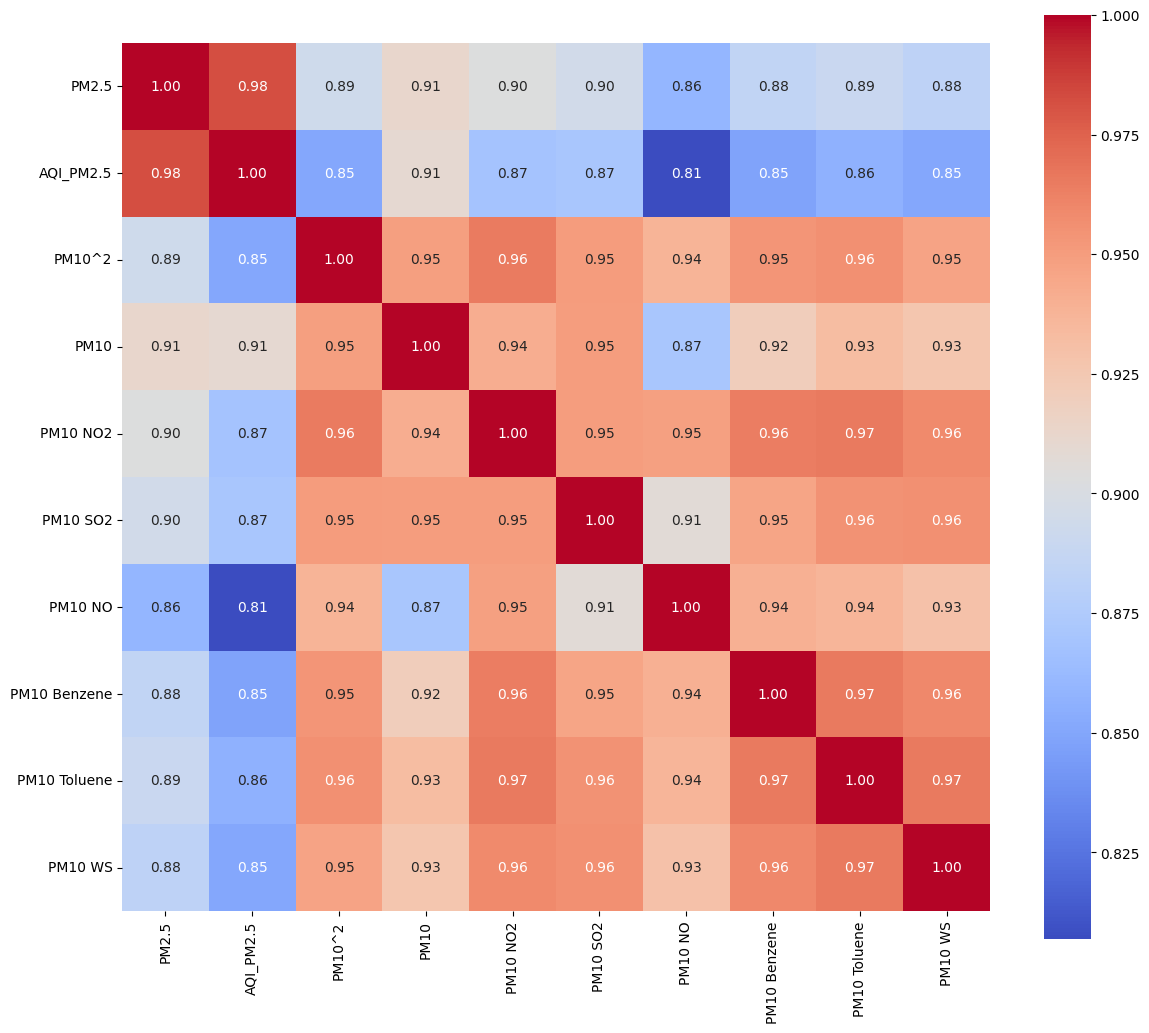

In [261]:
df_imp=X[['PM2.5','AQI_PM2.5', 
'PM10^2',
'PM10' ,
'PM10 NO2',
'PM10 SO2' ,
'PM10 NO' ,
'PM10 Benzene' , 
'PM10 Toluene' ,
'PM10 WS']]
plt.figure(figsize=(14, 12))
sns.heatmap(df_imp.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)

### Exploratory Analysis

In [262]:
df_imp.dropna(inplace=True)
print(len(df_imp))

2995


/var/folders/0q/vsvgsd3s4ws83m1fcrysjbvc0000gn/T/ipykernel_64657/872420466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp.dropna(inplace=True)


In [263]:
print(len(df_imp))
print(len(y))

2995
2995


In [264]:
y.unique()

array(['Very Unhealthy', 'Good', 'Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous', 'Moderate'],
      dtype=object)

(array([459.,  40.,  35.,  32.,  37.,  46.,  28.,  25.,  36.,  48.,  44.,
         69., 138., 162., 162., 162., 181., 103.,  98.,  98.,  96., 111.,
         83.,  94.,  77.,  68.,  60.,  48.,  61.,  68.,  54.,  43.,  32.,
         23.,  23.,  10.,  10.,   6.,   6.,   6.,   1.,   3.,   4.,   1.,
          0.,   1.,   2.,   0.,   0.,   1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

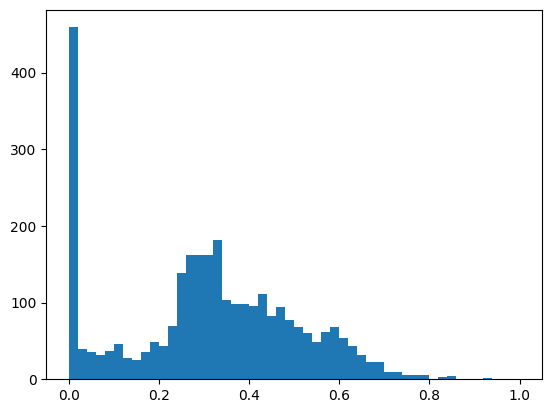

In [265]:
import matplotlib.pyplot as plt
X=df_imp
plt.hist(df_imp['AQI_PM2.5'], bins=50)

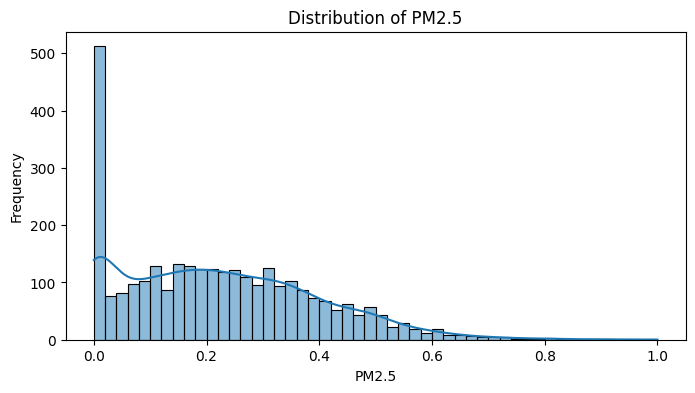

PM2.5:
  Skewness = 0.60
  Kurtosis = -0.05
--------------------


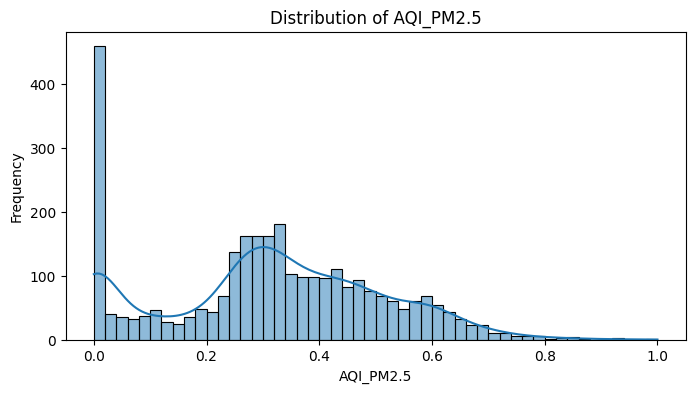

AQI_PM2.5:
  Skewness = 0.01
  Kurtosis = -0.61
--------------------


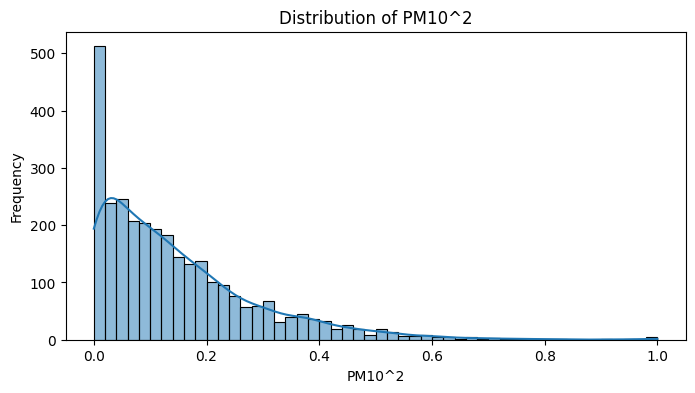

PM10^2:
  Skewness = 1.65
  Kurtosis = 3.92
  -> High skewness detected. Consider transformation (e.g., log, sqrt).
--------------------


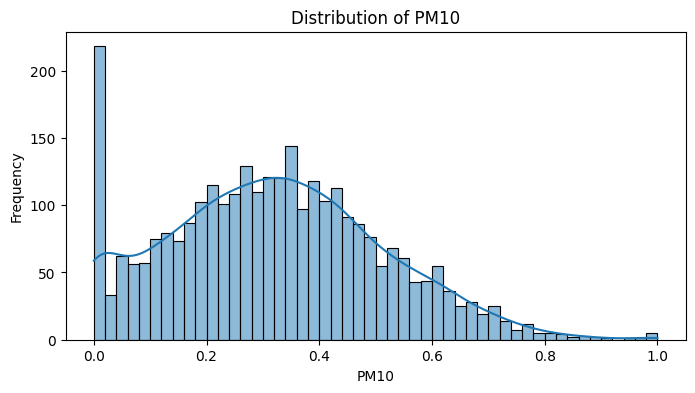

PM10:
  Skewness = 0.30
  Kurtosis = -0.25
--------------------


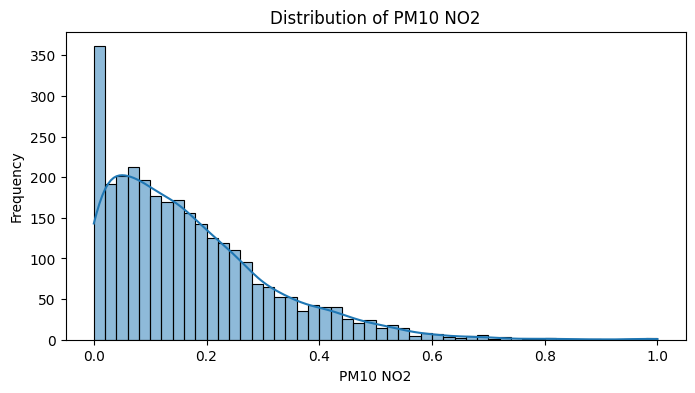

PM10 NO2:
  Skewness = 1.32
  Kurtosis = 2.41
--------------------


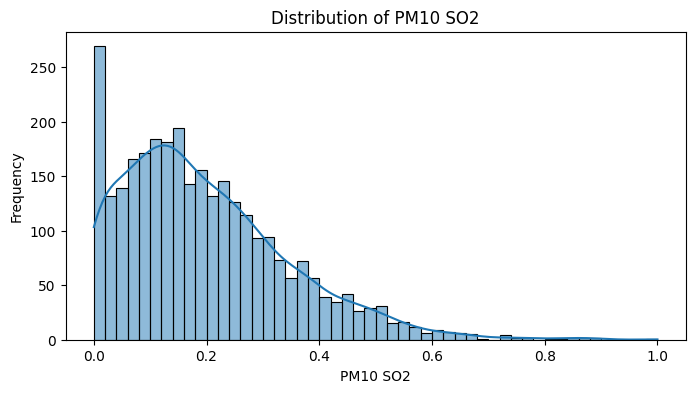

PM10 SO2:
  Skewness = 1.05
  Kurtosis = 1.41
--------------------


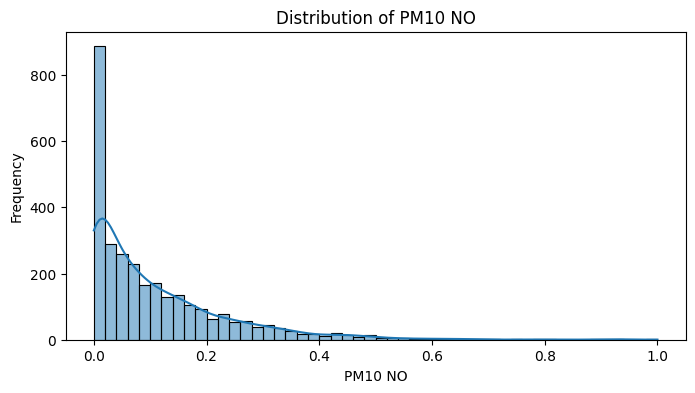

PM10 NO:
  Skewness = 2.00
  Kurtosis = 5.91
  -> High skewness detected. Consider transformation (e.g., log, sqrt).
--------------------


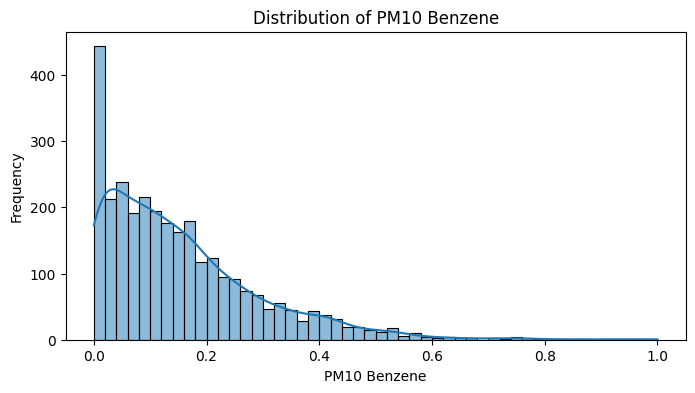

PM10 Benzene:
  Skewness = 1.47
  Kurtosis = 3.03
--------------------


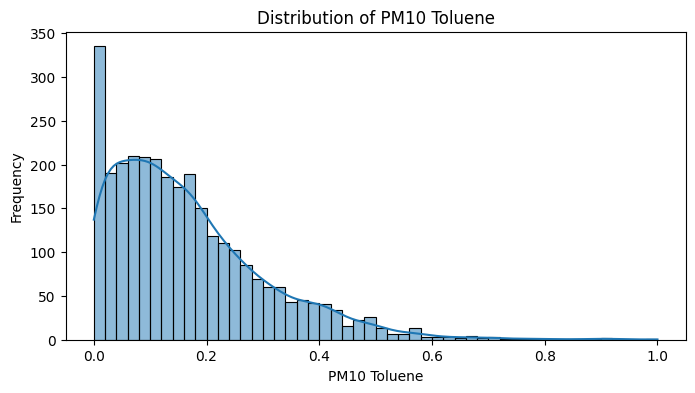

PM10 Toluene:
  Skewness = 1.36
  Kurtosis = 2.67
--------------------


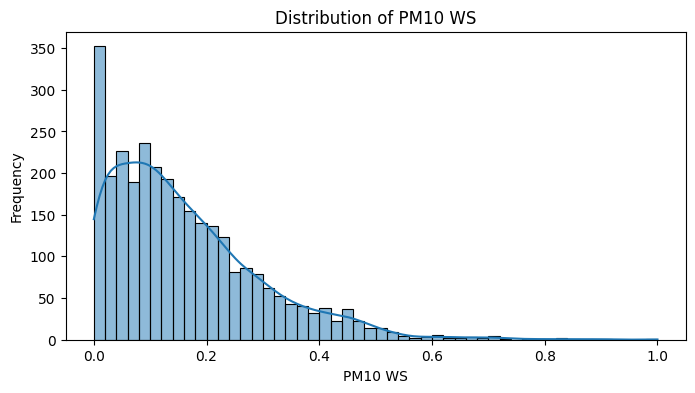

PM10 WS:
  Skewness = 1.33
  Kurtosis = 2.52
--------------------


In [266]:
for col in X.columns:
    # Check if column has non-NA values before plotting/calculating
    if X[col].notna().sum() > 0:
        plt.figure(figsize=(8, 4))
        sns.histplot(X[col], kde=True, bins=50) # dropna() for robustness
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

        skewness = X[col].skew()
        kurt = X[col].kurt()
        print(f"{col}:")
        print(f"  Skewness = {skewness:.2f}")
        print(f"  Kurtosis = {kurt:.2f}")
        # Suggest transformation for highly skewed variables
        if abs(skewness) > 1.5:
            print(f"  -> High skewness detected. Consider transformation (e.g., log, sqrt).")
        print("--------------------")
    else:
        print(f"{col}: Contains only NA values. Skipping.")
        print("--------------------")


Distribution of AQI Category:
                                Count  Percentage
AQI_Category                                     
Very Unhealthy                    935   31.218698
Unhealthy                         858   28.647746
Good                              446   14.891486
Hazardous                         349   11.652755
Moderate                          207    6.911519
Unhealthy for Sensitive Groups    200    6.677796


/var/folders/0q/vsvgsd3s4ws83m1fcrysjbvc0000gn/T/ipykernel_64657/3428901856.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AQI_Category', order=ordered_present_categories, palette='viridis')


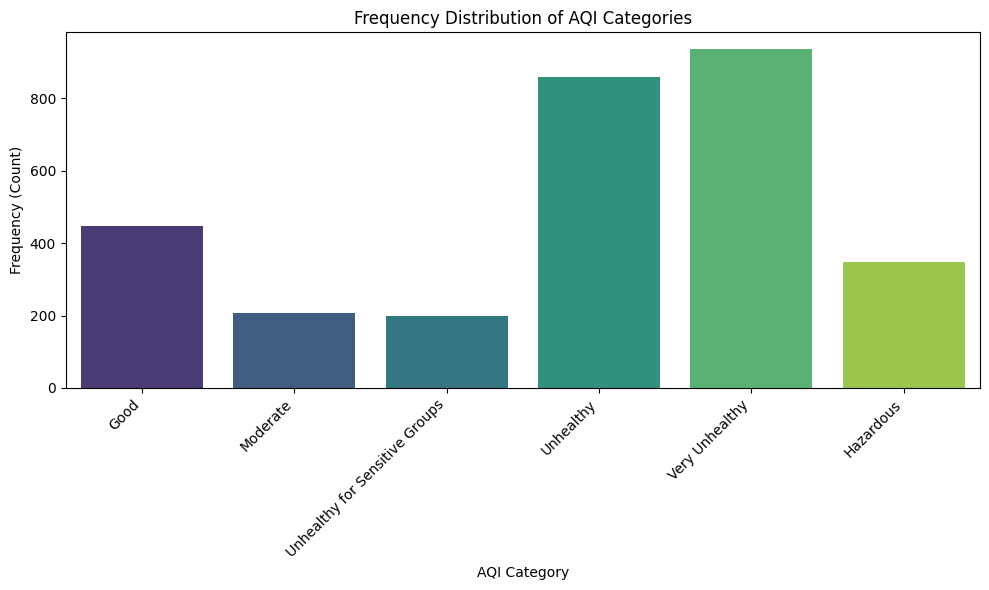

In [267]:
print("\nDistribution of AQI Category:")
print("=============================")
df = df_cleaned
# Calculate value counts and percentages
aqi_counts = df['AQI_Category'].value_counts()
aqi_percentages = df['AQI_Category'].value_counts(normalize=True) * 100

# Combine counts and percentages into a DataFrame for display
aqi_dist_df = pd.DataFrame({'Count': aqi_counts, 'Percentage': aqi_percentages})
print(aqi_dist_df)

# Plot the distribution
plt.figure(figsize=(10, 6))
# Define a sensible order for AQI categories
category_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous', 'Unknown']
# Filter order to only include categories present in the data
present_categories = df['AQI_Category'].unique()
ordered_present_categories = [cat for cat in category_order if cat in present_categories]

sns.countplot(data=df, x='AQI_Category', order=ordered_present_categories, palette='viridis')
plt.title('Frequency Distribution of AQI Categories')
plt.ylabel('Frequency (Count)')
plt.xlabel('AQI Category')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

#### Bivariate analysis


Generating Pair Plot (this might take a moment for many features)...


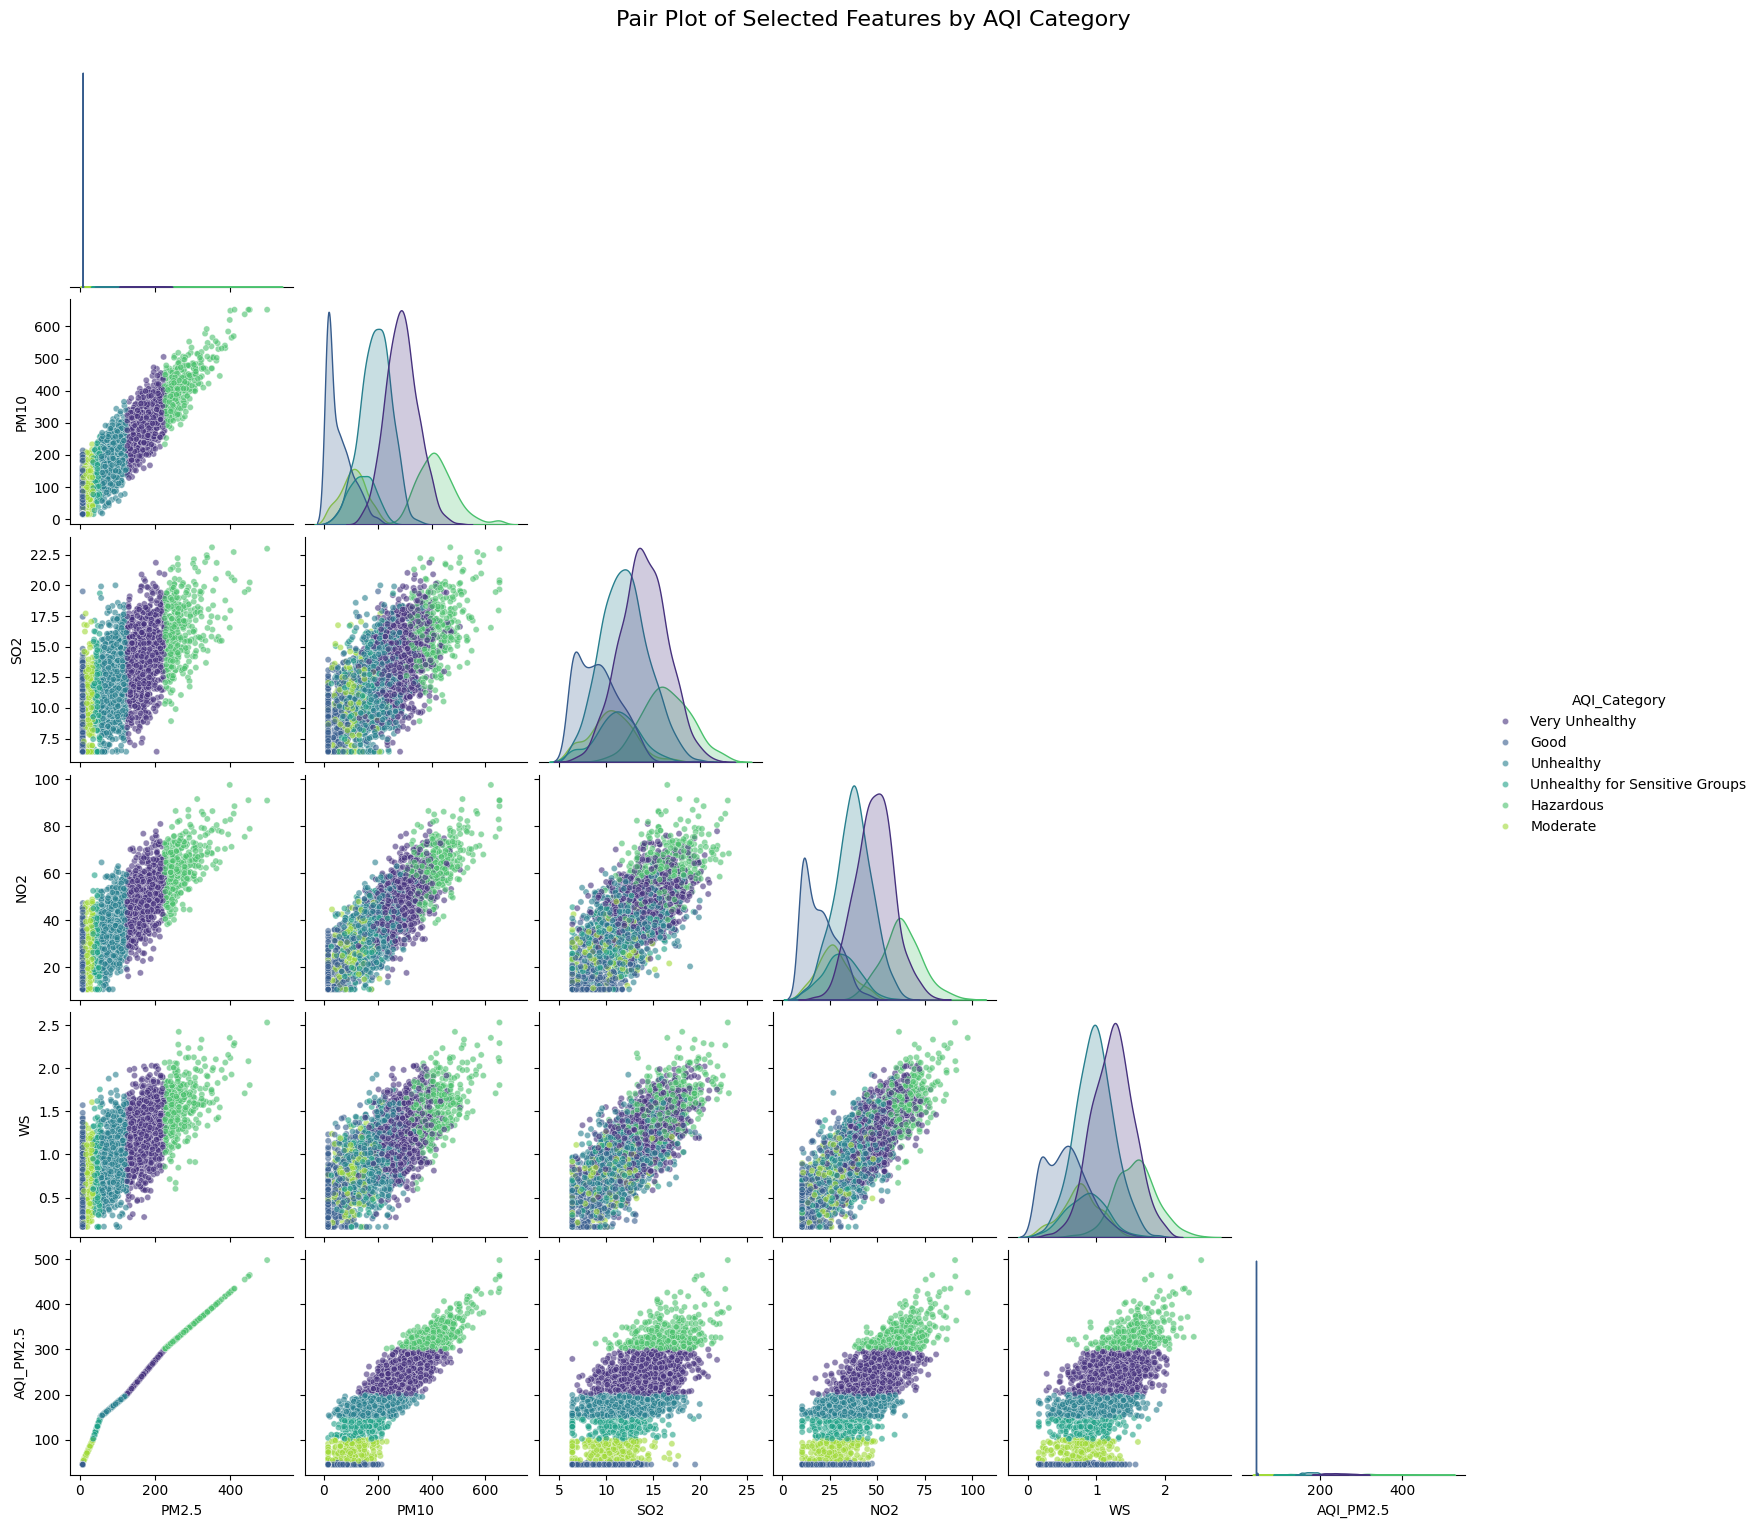

In [268]:
pairplot_features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temp', 'Humidity', 'WS', 'AQI_PM2.5', 'AQI_Category']

# Ensure only columns actually present in the DataFrame are selected
pairplot_features_existing = [col for col in pairplot_features if col in df.columns]

if 'AQI_Category' not in pairplot_features_existing:
    print("Warning: 'AQI_Category' not in selected features for pairplot hue. Add it to pairplot_features.")
    # Optionally add it if it exists in df:
    # if 'AQI_Category' in df.columns:
    #     pairplot_features_existing.append('AQI_Category')

# Drop rows with NaNs *only within the selected subset* for the pairplot
df_pairplot = df[pairplot_features_existing].dropna()

if not df_pairplot.empty and 'AQI_Category' in df_pairplot.columns:
    print("\nGenerating Pair Plot (this might take a moment for many features)...")
    # Use corner=True to only plot the lower triangle, saving computation and space
    # Use plot_kws and diag_kws to adjust marker size and histogram appearance if needed
    pair_plot = sns.pairplot(df_pairplot,
                             hue='AQI_Category',
                             palette='viridis', # Choose a suitable color palette
                             corner=True,
                             plot_kws={'alpha': 0.6, 's': 20}, # Adjust scatter plot appearance
                             ) # Adjust diagonal histogram appearance

    pair_plot.fig.suptitle('Pair Plot of Selected Features by AQI Category', y=1.02, fontsize=16) # Adjust title position
    plt.show()
elif 'AQI_Category' not in df_pairplot.columns:
     print("Skipping pairplot: 'AQI_Category' is required for hue but missing from the selected/available columns.")
else:
    print("Skipping pairplot: No data remaining after dropping NaNs in selected features.")



Numerical vs. Categorical Analysis (Box Plots):


/var/folders/0q/vsvgsd3s4ws83m1fcrysjbvc0000gn/T/ipykernel_64657/420641112.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AQI_Category', y=col, order=ordered_present_categories, palette='viridis', showfliers=True) # showfliers=False to hide outliers
/var/folders/0q/vsvgsd3s4ws83m1fcrysjbvc0000gn/T/ipykernel_64657/420641112.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AQI_Category', y=col, order=ordered_present_categories, palette='viridis', showfliers=True) # showfliers=False to hide outliers
/var/folders/0q/vsvgsd3s4ws83m1fcrysjbvc0000gn/T/ipykernel_64657/420641112.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

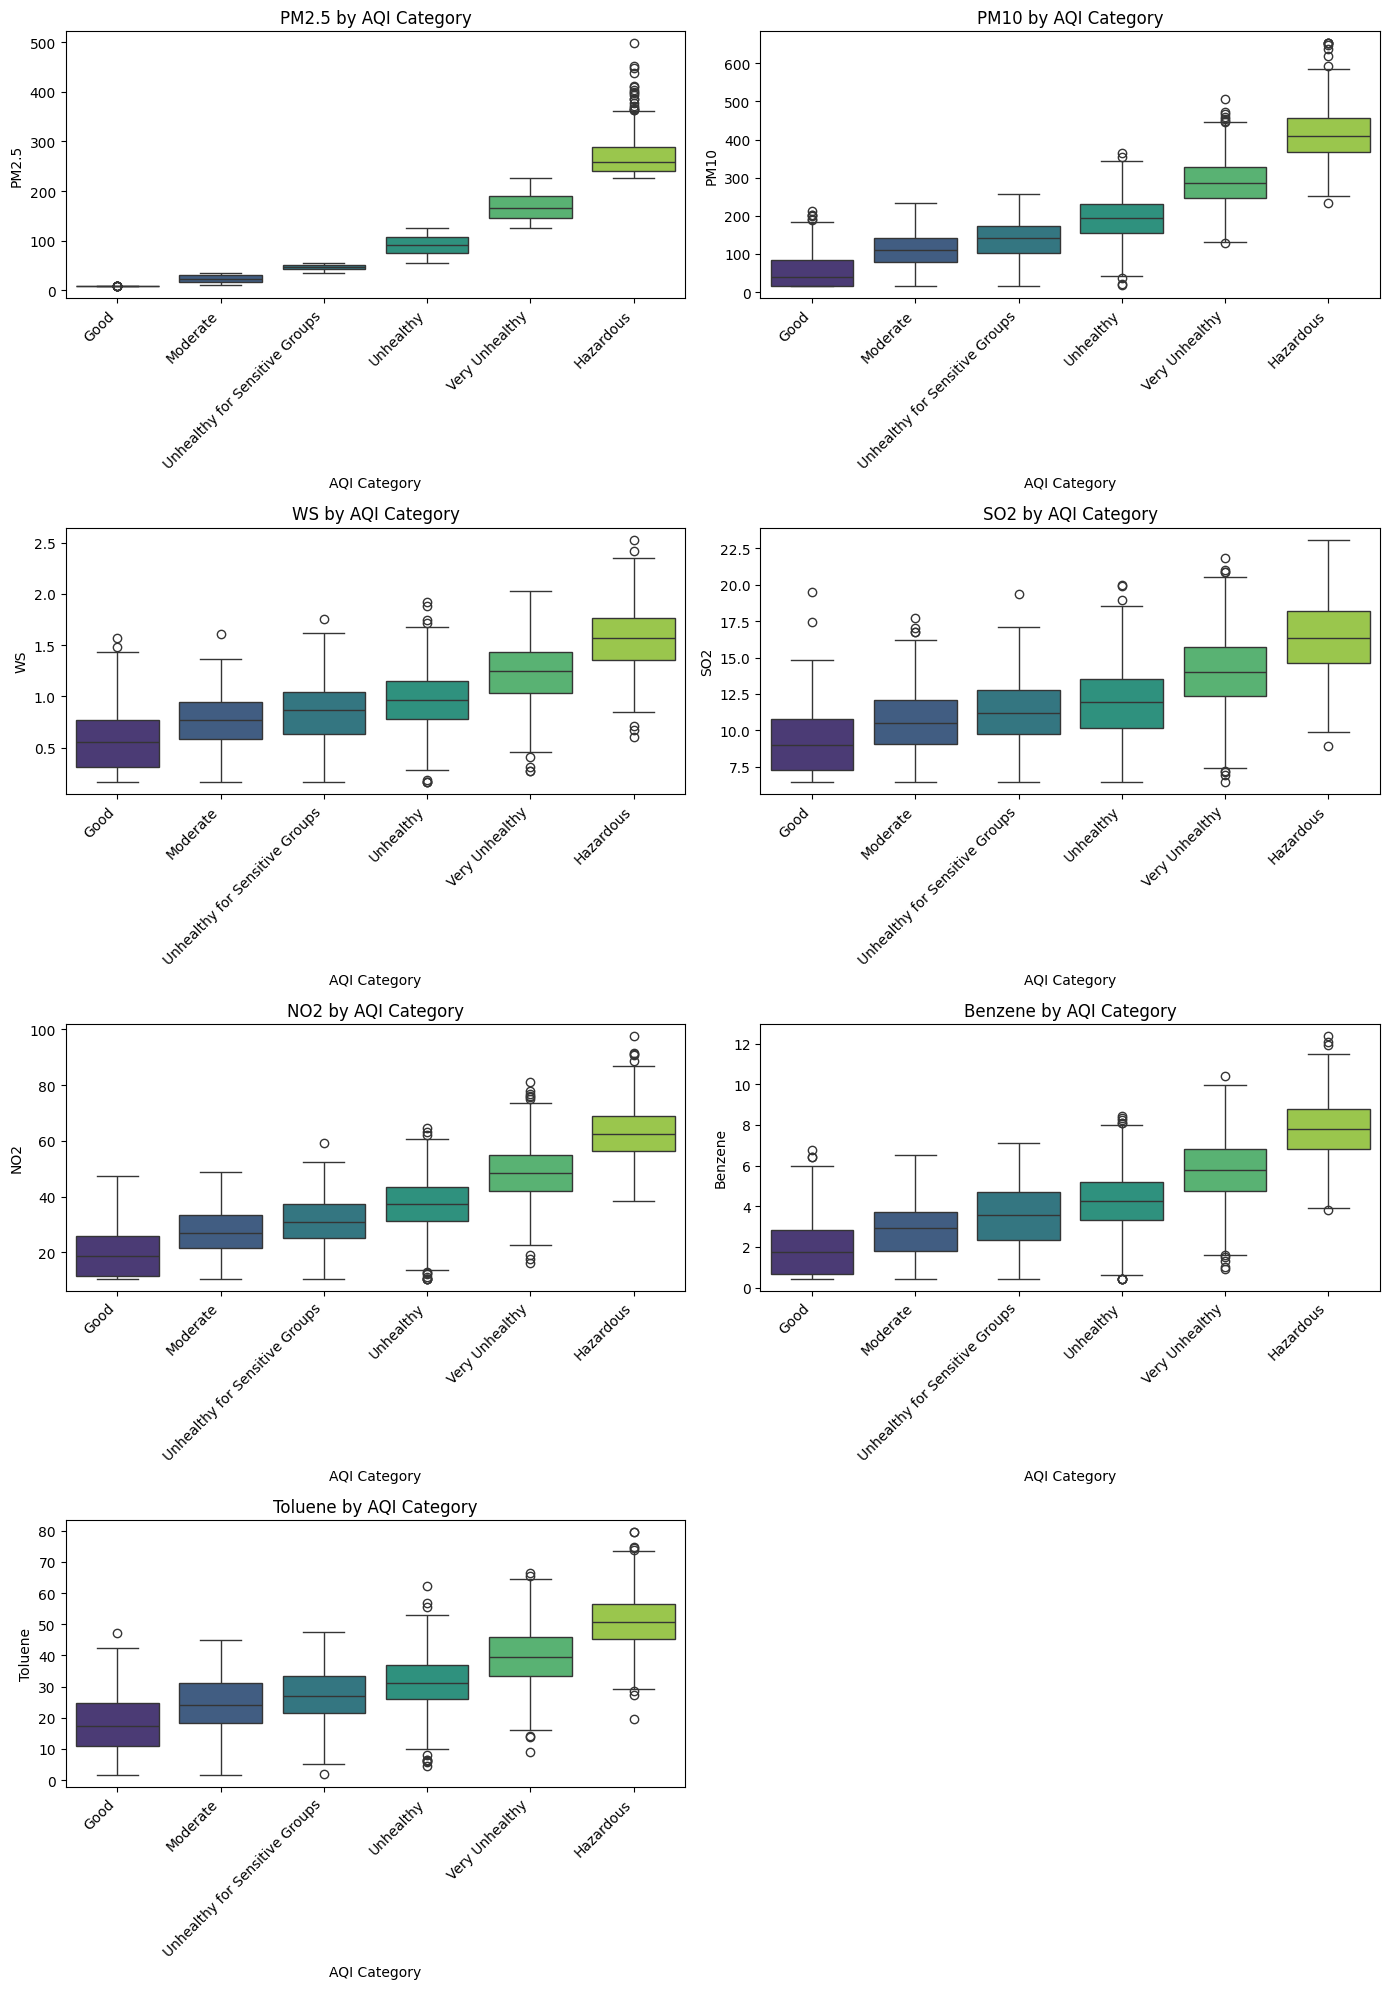

In [269]:

print("\nNumerical vs. Categorical Analysis (Box Plots):")
print("==============================================")

# Select key numerical features to compare across categories
# Adjust this list as needed
numerical_features_for_boxplot = ['PM2.5', 'PM10', 'Temp', 'Humidity', 'WS', 'SO2', 'NO2', 'CO', 'O3', 'Benzene', 'Toluene']
numerical_features_for_boxplot = [col for col in numerical_features_for_boxplot if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

# Define a sensible order for AQI categories
category_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous', 'Unknown']
# Filter order to only include categories present in the data
present_categories = df['AQI_Category'].unique()
ordered_present_categories = [cat for cat in category_order if cat in present_categories]


if not numerical_features_for_boxplot:
    print("No suitable numerical features found for boxplot analysis.")
elif not ordered_present_categories:
    print("No AQI Categories found for boxplot analysis.")
else:
    # Determine grid size for subplots
    n_features = len(numerical_features_for_boxplot)
    n_cols = 2 # Adjust number of columns for the subplot grid
    n_rows = int(np.ceil(n_features / n_cols))

    plt.figure(figsize=(n_cols * 7, n_rows * 5)) # Adjust overall figure size

    for i, col in enumerate(numerical_features_for_boxplot):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df, x='AQI_Category', y=col, order=ordered_present_categories, palette='viridis', showfliers=True) # showfliers=False to hide outliers
        plt.title(f'{col} by AQI Category')
        plt.xlabel('AQI Category')
        plt.ylabel(col)
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

#### Feature engineering

In [270]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame

print("Advanced Feature Engineering Examples:")
print("=====================================")

# Example 1: Create pollutant ratios (handle potential division by zero)
# Ensure the columns exist before creating the ratio
if 'Benzene' in df.columns and 'Toluene' in df.columns:
    # Replace 0 with NaN in the denominator to avoid division by zero errors, then calculate
    df['Benzene_Toluene_Ratio'] = df['Benzene'] / df['Toluene'].replace(0, np.nan)
    print("Created 'Benzene_Toluene_Ratio'.")
    # Display head of relevant columns
    display(df[['Benzene', 'Toluene', 'Benzene_Toluene_Ratio']].head())
    # Check how many NaNs were introduced/present
    print(f"NaNs in Benzene_Toluene_Ratio: {df['Benzene_Toluene_Ratio'].isnull().sum()}")
else:
    print("Skipping Benzene/Toluene ratio: One or both columns missing.")

print("---")

# Example 2: Create interaction term (Pollutant * Meteorological Variable)
if 'PM2.5' in df.columns and 'WS' in df.columns:
    df['PM25_x_WS'] = df['PM2.5'] * df['WS']
    print("Created 'PM25_x_WS' interaction term.")
    display(df[['PM2.5', 'WS', 'PM25_x_WS']].head())
else:
    print("Skipping PM2.5 * WS interaction: One or both columns missing.")



Advanced Feature Engineering Examples:
Created 'Benzene_Toluene_Ratio'.


,Benzene,Toluene,Benzene_Toluene_Ratio
0,6.520114,31.158716,0.209255
1,2.513483,16.354034,0.153692
2,5.233880,31.741881,0.164889
3,7.808313,41.575516,0.187810
4,4.904273,32.613540,0.150375


NaNs in Benzene_Toluene_Ratio: 0
---
Created 'PM25_x_WS' interaction term.


,PM2.5,WS,PM25_x_WS
0,157.108622,1.026232,161.229922
1,8.150000,0.473676,3.860459
2,118.737354,1.470767,174.635008
3,193.031999,1.239769,239.315073
4,148.698400,0.928544,138.073035


In [271]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,Benzene,Toluene,RH,WS,WD,...,SO2,NH3,CO_max_8hr,O3_max_8hr,AQI_PM2.5,AQI_Category,pollutionRatio,NO*Ws,Benzene_Toluene_Ratio,PM25_x_WS
0,157.108622,227.832836,64.074879,53.174701,82.786195,6.520114,31.158716,63.293394,1.026232,230.783324,...,14.753886,48.177829,2.696816,97.111004,232.0,Very Unhealthy,0.209255,65.755702,0.209255,161.229922
1,8.150000,15.520000,1.850000,20.948354,8.070000,2.513483,16.354034,35.812253,0.473676,128.406311,...,9.467940,12.010000,1.421097,17.547341,45.0,Good,0.153692,0.876301,0.153692,3.860459
2,118.737354,258.789414,84.875195,47.920183,64.886227,5.233880,31.741881,62.427723,1.470767,245.490335,...,17.690593,54.462860,2.903200,101.852036,195.0,Unhealthy,0.164889,124.831654,0.164889,174.635008
3,193.031999,303.083785,101.148209,51.242690,76.535339,7.808313,41.575516,70.798149,1.239769,216.414456,...,12.014509,46.998300,3.076310,80.428899,268.0,Very Unhealthy,0.187810,125.400406,0.187810,239.315073
4,148.698400,188.777638,29.582653,28.511134,54.949897,4.904273,32.613540,48.577728,0.928544,208.896339,...,12.941253,21.518878,1.329268,28.076582,224.0,Very Unhealthy,0.150375,27.468801,0.150375,138.073035


<Axes: xlabel='AQI_PM2.5', ylabel='Density'>

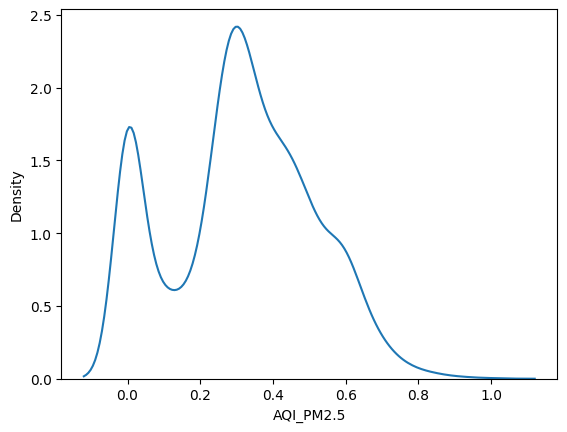

In [272]:
import seaborn as sns
plt.Figure(figsize=(5,5))
plt.axes()
sns.kdeplot(X['AQI_PM2.5'])

Using features for PCA: ['PM2.5', 'PM10^2', 'PM10', 'PM10 NO2', 'PM10 SO2', 'PM10 NO', 'PM10 Benzene', 'PM10 Toluene', 'PM10 WS']
Features scaled using StandardScaler.
PCA applied (n_components=2).
Explained Variance Ratio by Component 1: 94.02%
Explained Variance Ratio by Component 2: 2.04%
Total Explained Variance (2 components): 96.07%
Merged PCA results with AQI_Category.


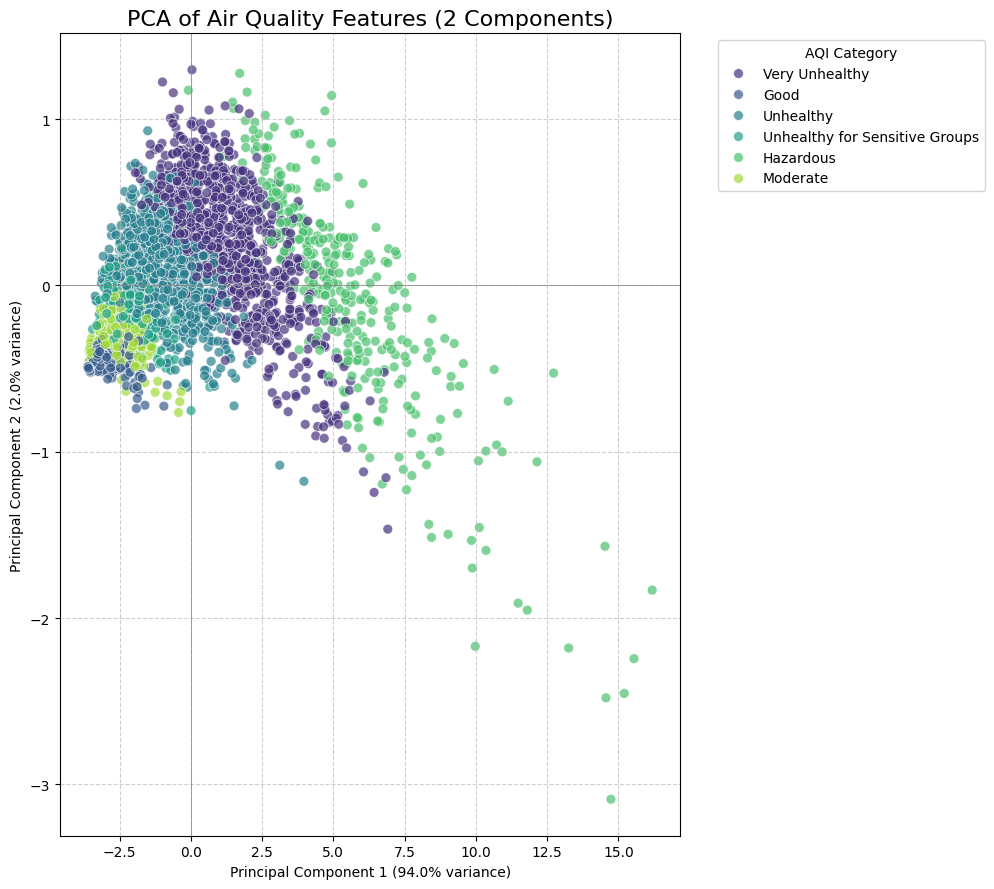

In [273]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features_to_exclude = ['AQI_PM2.5'] # Add other non-predictor numeric columns if needed
numerical_features_pca = X.select_dtypes(include=np.number).columns.tolist()
features_for_pca = [col for col in numerical_features_pca if col not in features_to_exclude]

if not features_for_pca:
    print("No suitable numerical features found for PCA after exclusions.")
else:
    print(f"Using features for PCA: {features_for_pca}")
    pca_data = X[features_for_pca].dropna()
    if pca_data.empty:
        print("Skipping PCA: No data remaining after dropping NaNs in selected features.")
    else:
        # Capture the index before scaling to join back AQI_Category later
        pca_index = pca_data.index

        # 2. Scale the features
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(pca_data)
        print("Features scaled using StandardScaler.")

        # 3. Apply PCA
        # Reduce to 2 components for 2D visualization
        pca = PCA(n_components=2, random_state=42) # Added random_state for reproducibility if needed by PCA implementation
        principal_components = pca.fit_transform(scaled_features)
        print("PCA applied (n_components=2).")

        # Print explained variance ratio
        explained_variance = pca.explained_variance_ratio_
        print(f"Explained Variance Ratio by Component 1: {explained_variance[0]*100:.2f}%")
        print(f"Explained Variance Ratio by Component 2: {explained_variance[1]*100:.2f}%")
        print(f"Total Explained Variance (2 components): {sum(explained_variance)*100:.2f}%")


        # 4. Create DataFrame for plotting
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=pca_index)

        # 5. Merge with AQI Category (using the saved index)
        # Ensure 'AQI_Category' exists in the original DataFrame 'df'
        if y.all():
            pca_df = pca_df.join(y)
            # Drop rows where AQI_Category might be missing after the join
            pca_df = pca_df.dropna(subset=['AQI_Category'])
            print("Merged PCA results with AQI_Category.")

            # 6. Plot PCA results
            if not pca_df.empty:
                plt.figure(figsize=(12, 9))
                sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='AQI_Category', palette='viridis', alpha=0.7, s=50) # Adjust alpha/s
                plt.title('PCA of Air Quality Features (2 Components)', fontsize=16)
                plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}% variance)')
                plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}% variance)')
                plt.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside plot
                plt.grid(True, linestyle='--', alpha=0.6)
                plt.axhline(0, color='grey', lw=0.5)
                plt.axvline(0, color='grey', lw=0.5)
                plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
                plt.show()
            else:
                print("Skipping PCA plot: No data remaining after merging with AQI_Category.")
        else:
            print("Skipping PCA plot: 'AQI_Category' column not found in original DataFrame for coloring.")


## Modelling

Naive Bayes

In [274]:
print(y.unique())

['Very Unhealthy' 'Good' 'Unhealthy' 'Unhealthy for Sensitive Groups'
 'Hazardous' 'Moderate']


In [275]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)
# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict(X_test)

print("Actual Value:", y_test)
print("Predicted Value:", predicted)

Actual Value: 597                          Hazardous
1913                    Very Unhealthy
1967                    Very Unhealthy
75      Unhealthy for Sensitive Groups
498                          Hazardous
                     ...              
548                          Unhealthy
2905                    Very Unhealthy
1365                         Unhealthy
2697                    Very Unhealthy
2748                    Very Unhealthy
Name: AQI_Category, Length: 989, dtype: object
Predicted Value: ['Hazardous' 'Unhealthy' 'Very Unhealthy' 'Unhealthy for Sensitive Groups'
 'Hazardous' 'Unhealthy' 'Good' 'Very Unhealthy' 'Hazardous' 'Moderate'
 'Unhealthy for Sensitive Groups' 'Unhealthy' 'Good' 'Good' 'Unhealthy'
 'Unhealthy' 'Moderate' 'Moderate' 'Very Unhealthy' 'Good' 'Unhealthy'
 'Unhealthy for Sensitive Groups' 'Good' 'Unhealthy' 'Unhealthy'
 'Very Unhealthy' 'Good' 'Very Unhealthy' 'Unhealthy' 'Good' 'Unhealthy'
 'Hazardous' 'Very Unhealthy' 'Unhealthy' 'Unhealthy' 'Hazardous'

In [276]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8736097067745198
F1 Score: 0.8733759141517131


#### Regression

In [277]:
X=X.dropna()
X.columns

Index(['PM2.5', 'AQI_PM2.5', 'PM10^2', 'PM10', 'PM10 NO2', 'PM10 SO2',
       'PM10 NO', 'PM10 Benzene', 'PM10 Toluene', 'PM10 WS'],
      dtype='object')

In [279]:
X = df.drop(columns=['PM2.5'])
y = df['PM2.5']

In [304]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def XGBoost(X, y):
    xgb_model_cv = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1)
    cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
    print(f"Using {cv_strategy.get_n_splits()}-Fold Cross-Validation.")

    # --- Perform Cross-Validation for multiple metrics ---
    # Note: cross_val_score calculates one metric at a time.
    # We need negative MSE/MAE because cross_val_score maximizes score (higher is better)
    print("Calculating cross-validation scores...")
    scoring = {
        'r2': 'r2',
        'neg_mse': 'neg_mean_squared_error',
        'neg_mae': 'neg_mean_absolute_error'
    }

    # Use cross_validate to get multiple scores at once
    from sklearn.model_selection import cross_validate
    cv_results = cross_validate(xgb_model_cv, X, y, cv=cv_strategy, scoring=scoring, n_jobs=-1)

    # --- Process and Display Results ---
    avg_r2 = np.mean(cv_results['test_r2'])
    std_r2 = np.std(cv_results['test_r2'])
    avg_mse = -np.mean(cv_results['test_neg_mse']) # Flip sign back
    std_mse = np.std(cv_results['test_neg_mse'])
    avg_rmse = np.sqrt(avg_mse) # Calculate RMSE from average MSE
    avg_mae = -np.mean(cv_results['test_neg_mae']) # Flip sign back
    std_mae = np.std(cv_results['test_neg_mae'])

    print("\nXGBoost Cross-Validation Results (5-Fold):")
    print(f"  Average R² Score: {avg_r2:.4f} (± {std_r2:.4f})")
    print(f"  Average MSE:      {avg_mse:.4f} (± {std_mse:.4f})")
    print(f"  Average RMSE:     {avg_rmse:.4f}")
    print(f"  Average MAE:      {avg_mae:.4f} (± {std_mae:.4f})")

XGBoost(X, y)

Using 5-Fold Cross-Validation.
Calculating cross-validation scores...

XGBoost Cross-Validation Results (5-Fold):
  Average R² Score: 0.9989 (± 0.0007)
  Average MSE:      7.6031 (± 4.7586)
  Average RMSE:     2.7574
  Average MAE:      0.5936 (± 0.0869)


In [305]:
import torch.nn as nn
class RegressionNet(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(input_dim, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32,1)
    )
  def forward(self, x):
    return self.net(x)


model = RegressionNet(X.shape[1])

In [333]:
print(y_tensor.min(), y_tensor.max())


tensor(8) tensor(497)


In [350]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Only select numeric columns for features
X = X.select_dtypes(include=np.number)

# Convert to tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)  # Match model dtype
y_np = np.array(y)
y_tensor = torch.tensor(y_np, dtype=torch.float32)


# Train-test split
X_train, X_val, Y_train, Y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Dataset and loaders
train_ds = TensorDataset(X_train, Y_train)
val_ds = TensorDataset(X_val, Y_val)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)


In [351]:
model = RegressionNet(X.shape[1])


In [352]:
import torch
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [353]:
print(next(model.parameters()).dtype)  # Should be torch.float32


torch.float32


In [354]:
# Get input dimension from your feature tensor X_tensor
input_dim = X_tensor.shape[1]

# --- Set dtype and define optimizer AFTER correct instantiation ---
model = model.float()

In [355]:
for xb, yb in train_loader:
    print(yb.float().unsqueeze(1))

tensor([[ 11.8427],
        [263.9677],
        [ 46.2291],
        [  8.1500],
        [204.1077],
        [  8.1500],
        [  8.1500],
        [ 23.5229],
        [ 57.5520],
        [249.8324],
        [191.4497],
        [ 64.3018],
        [153.3990],
        [  8.1500],
        [  8.1500],
        [  8.1500],
        [131.0824],
        [155.4260],
        [ 42.2644],
        [  8.1500],
        [ 61.6535],
        [  8.1500],
        [135.5995],
        [ 23.6826],
        [ 34.3023],
        [ 73.3859],
        [ 33.9077],
        [ 53.6889],
        [ 86.9266],
        [173.7511],
        [223.3834],
        [  8.1500]])
tensor([[182.2483],
        [147.5053],
        [108.0961],
        [ 70.0025],
        [142.3519],
        [185.6978],
        [165.8637],
        [301.0340],
        [ 75.8053],
        [ 92.8716],
        [  8.1500],
        [172.0285],
        [  8.1500],
        [  8.1500],
        [ 79.1061],
        [155.5258],
        [210.1405],
        [144.9805],

In [356]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

epochs = 500
for epoch in range(epochs):
    model = model.float()
    model.train()
    epoch_loss =0 
    for xb, yb in train_loader:
        yb = yb
        pred = model(xb)
        loss = criterion(pred, yb.float().unsqueeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(f"Loss: {loss.item():.6f}")


# Evaluation
model.eval()
with torch.no_grad():
    val_preds = model(X_val)
    y_val_reshaped = Y_val.float() 
    val_loss = criterion(val_preds, y_val_reshaped)


# Convert tensors to NumPy arrays for metric computation
val_preds_np = val_preds.numpy()
y_val_np = Y_val.numpy()
mae = mean_absolute_error(y_val_np, val_preds_np)
rmse = mean_squared_error(y_val_np, val_preds_np)
r2 = r2_score(y_val_np, val_preds_np)
print("mean_squared_error:", rmse)

Loss: 7967.397949
Loss: 7818.271484
Loss: 5836.059082
Loss: 1977.485840
Loss: 1876.171875
Loss: 571.461304
Loss: 1026.938599
Loss: 725.014587
Loss: 2322.662842
Loss: 1450.211670
Loss: 1535.512451
Loss: 714.355347
Loss: 1763.476562
Loss: 516.111755
Loss: 1853.278564
Loss: 1422.515137
Loss: 941.160767
Loss: 818.942200
Loss: 1365.309814
Loss: 920.458252
Loss: 329.556030
Loss: 765.096497
Loss: 765.098938
Loss: 579.590942
Loss: 507.855530
Loss: 441.369324
Loss: 389.717102
Loss: 576.109497
Loss: 274.492462
Loss: 179.591278
Loss: 254.511932
Loss: 512.054810
Loss: 440.275970
Loss: 176.614624
Loss: 643.732788
Loss: 411.746582
Loss: 361.510590
Loss: 433.362000
Loss: 345.044922
Loss: 120.394531
Loss: 223.517090
Loss: 257.308685
Loss: 267.258209
Loss: 297.484558
Loss: 218.314651
Loss: 322.787628
Loss: 192.671417
Loss: 230.101212
Loss: 261.292236
Loss: 191.220001
Loss: 172.646683
Loss: 132.270416
Loss: 180.407974
Loss: 239.461502
Loss: 152.658203
Loss: 140.507385
Loss: 206.367355
Loss: 177.094162
L

/opt/anaconda3/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([599])) that is different to the input size (torch.Size([599, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [357]:
print(val_preds[:5].squeeze())
print(Y_val[:5])

tensor([147.5928,   8.4605, 148.5827, 108.1831, 114.7777])
tensor([146.1782,   8.1500, 146.2198, 106.7499, 113.0081])


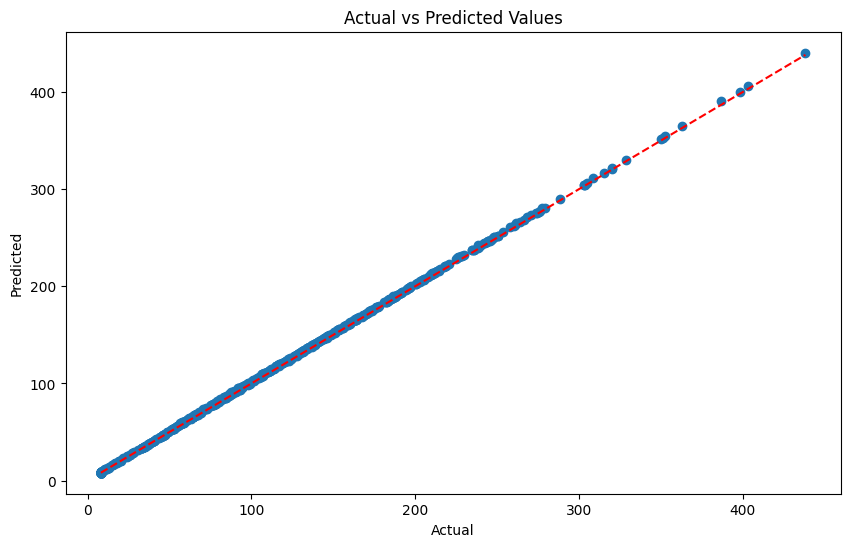

In [358]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_val_np, val_preds_np)
plt.plot([min(y_val_np), max(y_val_np)], [min(y_val_np), max(y_val_np)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [359]:
import pandas as pd
import numpy as np

# Assuming your data is in a DataFrame
correlations = pd.DataFrame(X_train).corrwith(pd.Series(Y_train))
important_features = correlations[abs(correlations) > 0.1].index.tolist()  # Adjust threshold as needed

# Use only important features
x_train_selected = X_train[:, important_features]
x_val_selected = X_val[:, important_features]

In [288]:
len(X.columns)

21

In [369]:
# from sklearn.ensemble import RandomForestRegressor
# import numpy as np

# # Train a Random Forest to get feature importances
# rf = RandomForestRegressor()
# rf.fit(X_train, Y_train)

# # Get sorted feature importances
# importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]

# # Select top K features
# top_k = 5
# top_features = indices[:top_k]
# print("Top features:", top_features)

# # Use only top K features from X
# X = X.iloc[:, top_features]
# X.head()  # Use .iloc if X is a DataFrame

In [370]:

# X_tensor = torch.tensor(X, dtype = torch.float32)
# y_tensor = torch.tensor(y, dtype = torch.float32)

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# train_ds = TensorDataset(x_train, y_train)
# val_ds = TensorDataset(x_val, y_val)
# train_loader = DataLoader(train_ds, batch_size = 32, shuffle = True)
# val_loader = DataLoader(val_ds, batch_size = 32)

In [371]:
len(y_train)

2396

In [372]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
gb_preds = gb_model.predict(x_val)
gb_mse = mean_squared_error(y_val, gb_preds)
print(f"Gradient Boosting MSE: {gb_mse}")

Gradient Boosting MSE: 0.9271230696088301


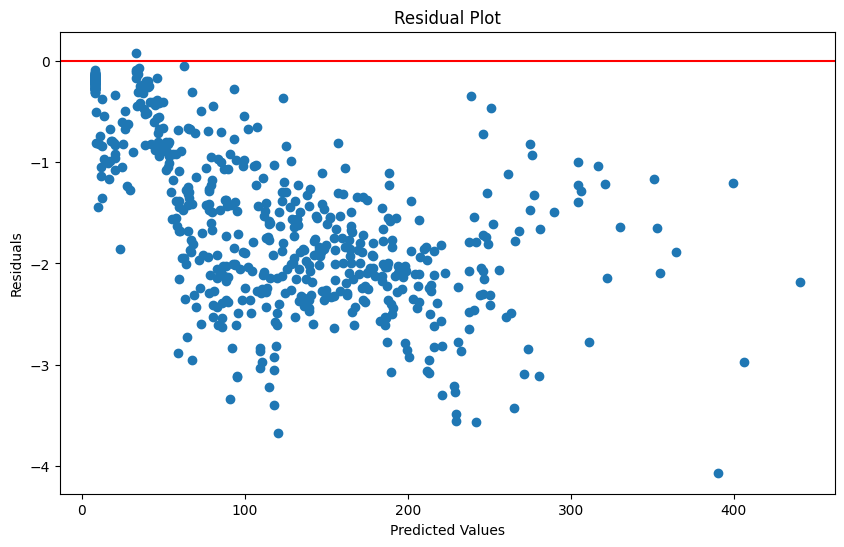

In [373]:
val_preds_np = val_preds_np.ravel()
y_val_np = y_val_np.ravel()
residuals = y_val_np - val_preds_np

plt.figure(figsize=(10, 6))
plt.scatter(val_preds_np, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [374]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [375]:
x_train.shape

(2396, 21)

In [376]:
y_train= np.squeeze(y_train)
print(y_train.shape)

(2396,)


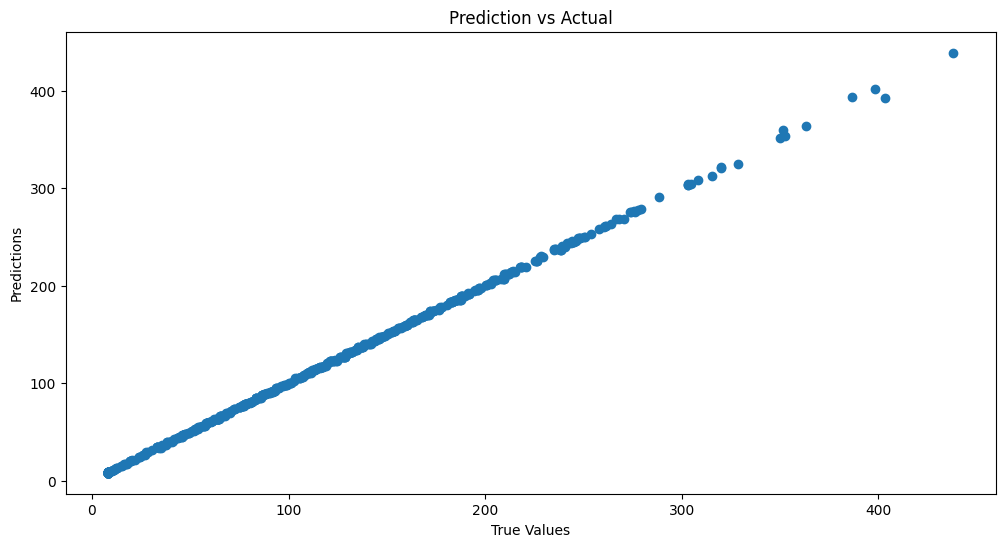

In [377]:
plt.figure(figsize=(12,6))
plt.title("gradient boosting model")

y_pred = model.predict(x_val)
plt.scatter(y_val, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Prediction vs Actual")
plt.show()

Mean Squared Error (MSE): 1.0048
Root Mean Squared Error (RMSE): 1.0024
Mean Absolute Error (MAE): 0.5988
R² Score: 0.9999


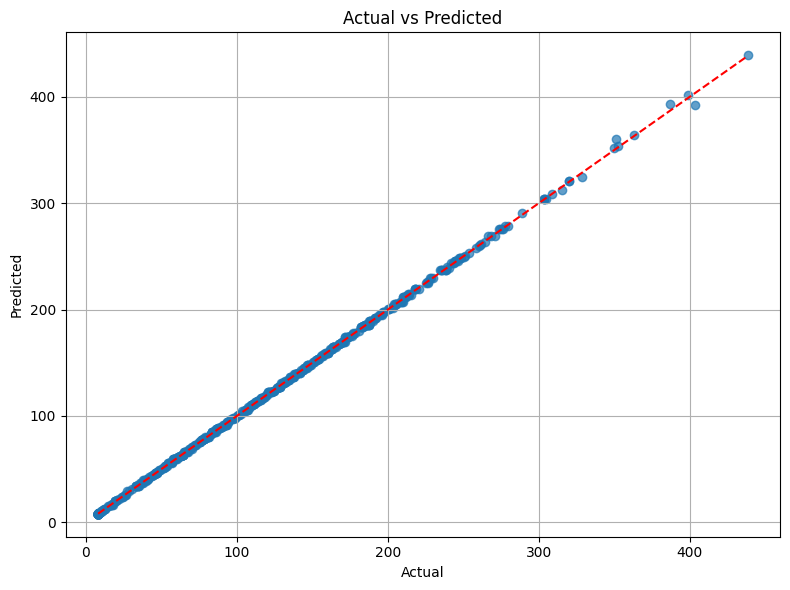

In [378]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 5: Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 3.5597
Root Mean Squared Error (RMSE): 1.8867
Mean Absolute Error (MAE): 0.4376
R² Score: 0.9995


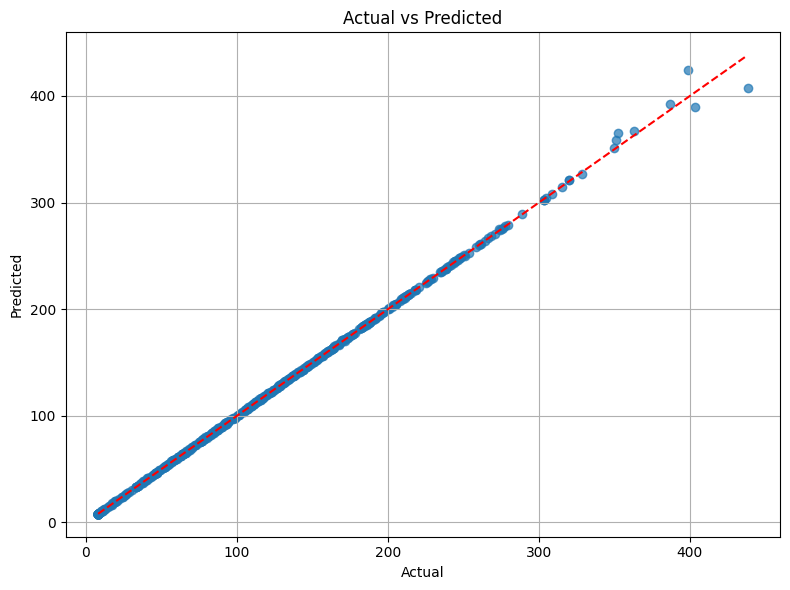

In [379]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assume X and y are already defined correctly
# X.shape = (796, 5), y.shape = (796,)

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 3: Predict
y_pred = model.predict(X_test)

# Step 4: Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 5: Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [380]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),  # Important: scales the features!
    MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Neural Net RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

Neural Net RMSE: 1.49, MAE: 1.11, R²: 0.9997


In [381]:
from xgboost import XGBRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional for tree models, needed for neural nets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_val)

rmse = mean_squared_error(y_val, xgb_preds, squared=False)
mae = mean_absolute_error(y_val, xgb_preds)
r2 = r2_score(y_val, xgb_preds)

print(f"XGBoost RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

XGBoost RMSE: 3.40, MAE: 0.68, R²: 0.9983


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [382]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=1)

# Predictions
nn_preds = model.predict(X_val_scaled).ravel()

rmse_nn = mean_squared_error(y_val, nn_preds, squared=False)
mae_nn = mean_absolute_error(y_val, nn_preds)
r2_nn = r2_score(y_val, nn_preds)

print(f"Neural Net RMSE: {rmse_nn:.2f}, MAE: {mae_nn:.2f}, R²: {r2_nn:.4f}")

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 18784.6816 - mae: 110.0430 - val_loss: 6386.3228 - val_mae: 65.6744
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 4851.2095 - mae: 57.2677 - val_loss: 3574.2378 - val_mae: 48.1428
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 3356.4768 - mae: 46.7343 - val_loss: 1694.1965 - val_mae: 32.2919
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 1320.4617 - mae: 28.7111 - val_loss: 694.4040 - val_mae: 20.5369
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 638.4118 - mae: 19.2783 - val_loss: 371.7361 - val_mae: 15.1241
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 423.2126 - mae: 15.7303 - val_loss: 241.6493 - val_mae: 12.1561
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 315.5244 - mae: 13.5603 - val_loss: 177.0457 - val_mae: 10.4318
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 297.0956 - mae: 13.3027 - val_loss: 115.9667 - val_mae: 8.4770
Epoch

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


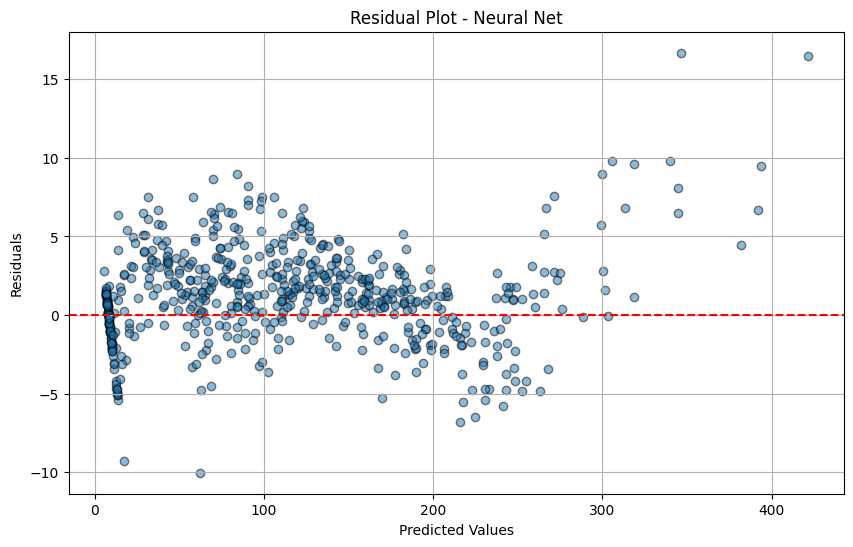

In [383]:
import matplotlib.pyplot as plt

residuals = y_val.values - nn_preds

plt.figure(figsize=(10, 6))
plt.scatter(nn_preds, residuals, alpha=0.5, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Neural Net')
plt.grid(True)
plt.show()